In [1]:
from scipy.fft import fft, fftfreq
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from  scipy import optimize

## <font color="darkblue"> **Análisis para Péndulo fisico 1**

In [3]:
#Read pandas data frame
file = "https://docs.google.com/spreadsheets/d/e/2PACX-1vT1on46nfXC-sPxOXOPO-OXCDIFOdmJWhn_WLEMFDX8REAmfrkT3XwFNuaYxk4gz2FE1KEJo2oHrUyG/pub?output=csv"
df = pd.read_csv(file, sep=";", decimal='.')
df = df.rename(columns ={'Tiempo (ms)':"Tiempo[ms]", 'Ángulo 1,':'AnguloDeg'})
df.AnguloDeg = df.AnguloDeg.str.replace(',', '.').astype(float)
df["AnguloRad"] = np.deg2rad(df.AnguloDeg)
df

,Tiempo[ms],AnguloDeg,AnguloRad
0,9,59.289612,1.034799
1,42,59.982327,1.046889
2,75,61.237453,1.068795
3,108,63.492477,1.108153
4,142,65.388771,1.141249
...,...,...,...
2842,94709,94.937576,1.656973
2843,94743,96.479851,1.683891
2844,94776,97.940689,1.709387
2845,94809,99.318092,1.733428


In [ ]:
df = df.rename(columns ={'Tiempo (ms)':"Tiempo[ms]", 'Ángulo 1,':'AnguloDeg'})
df

,Tiempo[ms],AnguloDeg
0,9,"59,289611816406"
1,42,"59,9823265075684"
2,75,"61,2374534606934"
3,108,"63,49247741699"
4,142,"65,3887710571289"
...,...,...
2842,94709,"94,9375762939453"
2843,94743,"96,479850769043"
2844,94776,"97,9406890869141"
2845,94809,"99,3180923461914"


In [ ]:
type(df.AnguloDeg[1])

str

In [ ]:
df.AnguloDeg = df.AnguloDeg.str.replace(',', '.').astype(float)
df["AnguloRad"] = np.deg2rad(df.AnguloDeg)

In [ ]:
df.head()

,Tiempo[ms],AnguloDeg,AnguloRad
0,9,59.289612,1.034799
1,42,59.982327,1.046889
2,75,61.237453,1.068795
3,108,63.492477,1.108153
4,142,65.388771,1.141249


In [ ]:
df["AnguloDeg"]=df["AnguloDeg"]-90
df["AnguloRad"]=df["AnguloRad"]-np.pi/2

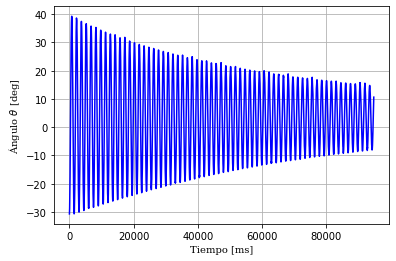

In [ ]:
plt.figure()
plt.plot(df['Tiempo[ms]'], df['AnguloDeg'], "b-")
plt.xlabel("Tiempo [ms]", fontdict={'family': 'serif'})
plt.ylabel("Ángulo $\\theta$ [deg]" , fontdict={'family': 'serif'})
plt.grid(True)
#plt.tight_layout()
#plt.savefig("Gráficas_P11.jpg")

(0.0, 10000.0)

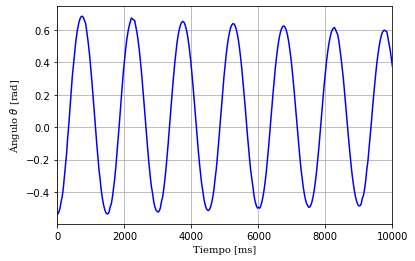

In [ ]:
plt.figure()
plt.plot(df['Tiempo[ms]'], df['AnguloRad'], "b-")
plt.xlabel("Tiempo [ms]", fontdict={'family': 'serif'})
plt.ylabel("Ángulo $\\theta$ [rad]" , fontdict={'family': 'serif'})
plt.grid(True)
plt.xlim(0, 10000)
#plt.tight_layout()
#plt.savefig("Gráficas_P11.jpg")

## <font color="darkblue"> **Transformada de Fourier**

In [ ]:
tf = fft(df['AnguloRad'].values)

In [ ]:
fftfreq?

In [ ]:
T = 33E-3 #Paso del tiempo

N = len(df['Tiempo[ms]'])
xf = fftfreq(N, T)[:N//2]

(0.0, 2.0)

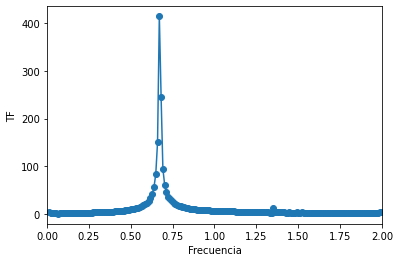

In [ ]:
plt.plot(xf[1:N//2], np.abs(tf[1:N//2]),"o-")
plt.ylabel("TF")
plt.xlabel("Frecuencia")
plt.xlim(0, 2)


In [ ]:
# Valor de frecuencia para el cual ocurre el maximo.
index = np.argmax(np.abs(tf[1:N//2]))
Frecuencia = xf[1:N//2][index]
Periodo = 1/Frecuencia 

print(f"La frecuencia del pendulo es:{Frecuencia:.5} Hz")
print(f"El periodo del péndulo es:{Periodo:.5} s")

La frecuencia del pendulo es:0.67056 Hz
El periodo del péndulo es:1.4913 s


### <font color = "darkblue"> **Ajuste del Modelo y Datos Experimentales** </font>  

In [ ]:
# Fit 
def func(t, A,  omega , fi, b, C):
  return   C + A * np.cos(omega * t + fi)* np.exp(-b* t) # Función Movimiento Amortiguado

# def func(t, A,   fi, b ):
#   return   A * np.cos(2*np.pi*1.19 * t + fi)* np.exp(-b* t) # Función Movimiento Amortiguado


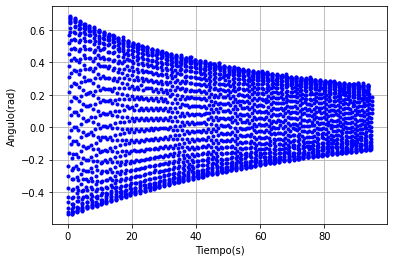

In [ ]:
vi = 0
plt.plot(df["Tiempo[ms]"].iloc[vi:]/1000, df["AnguloRad"].iloc[vi:],"b.")
plt.xlabel("Tiempo(s)")
plt.ylabel("Angulo(rad)")
plt.grid()

In [ ]:
popt, cov =  optimize.curve_fit(func, df["Tiempo[ms]"].iloc[vi:]/1000, df["AnguloRad"].iloc[vi:] )
cov

array([[ 5.79239929e-06,  1.73194576e-09, -7.90245679e-08,
        -1.92008203e-07,  9.68531278e-10],
       [ 1.73194576e-09,  1.04361409e-08, -3.14601525e-07,
        -6.76401583e-11,  3.66841865e-10],
       [-7.90245679e-08, -3.14601525e-07,  1.54945642e-05,
         2.83748276e-09, -2.11269447e-08],
       [-1.92008203e-07, -6.76401583e-11,  2.83748276e-09,
         1.04229661e-08, -1.99741499e-10],
       [ 9.68531278e-10,  3.66841865e-10, -2.11269447e-08,
        -1.99741499e-10,  4.28632133e-07]])

(0.0, 50.0)

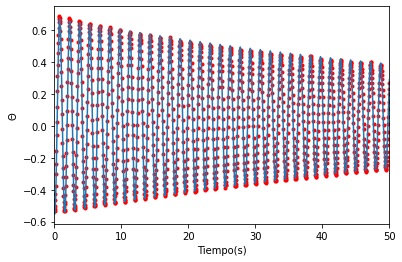

In [ ]:
plt.plot(df["Tiempo[ms]"]/1000, df["AnguloRad"],  "r.")
plt.plot( df["Tiempo[ms]"]/1000, func(df["Tiempo[ms]"]/1000, *popt))
plt.xlabel("Tiempo(s)")
plt.ylabel("$\\Theta $")
plt.xlim(0, 50)

1. Describir lo que pasa con el movimiento segun la curva en rojo.
2. ¿Que conclusion se puede sacar al comparar la curva en azul y la cruva en rojo?
3. ¿Cuál es la frecuencia, Periodo, Amplitud, desfase de movimiento?
4. ¿Según el mivimiento del péndulo y la teoría se puede concluir que el péndulo sigue un movimiento amortiguado?

In [ ]:
   A,  omega , fi, b, C = popt

In [ ]:
print(f"Valor de la amplitud {A}")
print(f"Frecuencia angular {omega}")
print(f"Desfase {fi}")
print(f"Coeficiente de amortiguaiento {b}")


Valor de la amplitud -0.6132109676674858
Frecuencia angular 4.194980691952388
Desfase -0.1657468258452266
Coeficiente de amortiguaiento 0.012616787250302151


# PENDULO FISICO

```
# This is formatted as code
```



In [ ]:
from scipy.fft import fft, fftfreq
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from  scipy import optimize

In [ ]:
#Read pandas data frame
file = "https://docs.google.com/spreadsheets/d/e/2PACX-1vR4eglbkk6V1SqNdKl6LIPSt-cXJSTqzo8qZR8DTkuKwVe3Z_v-WFjAxf9AuQVRYMZIKck8A2lvbjWC/pub?output=csv"
df = pd.read_csv(file, sep=";", decimal='.')

In [ ]:
df

,Tiempo (ms),"Ángulo 1,"
0,3,"119,735702514648"
1,69,"115,573974609375"
2,135,"105,657943725586"
3,201,"92,5997467041016"
4,267,"80,6736679077148"
...,...,...
1113,70458,"106,67436218262"
1114,70524,"106,584075927734"
1115,70557,"106,347427368164"
1116,70623,"104,917152404785"


In [ ]:
df = df.rename(columns ={'Tiempo (ms)':"Tiempo[ms]", 'Ángulo 1,':'AnguloDeg'})
df

,Tiempo[ms],AnguloDeg
0,3,"119,735702514648"
1,69,"115,573974609375"
2,135,"105,657943725586"
3,201,"92,5997467041016"
4,267,"80,6736679077148"
...,...,...
1113,70458,"106,67436218262"
1114,70524,"106,584075927734"
1115,70557,"106,347427368164"
1116,70623,"104,917152404785"


In [ ]:
type(df.AnguloDeg[1])

str

In [ ]:
df.AnguloDeg = df.AnguloDeg.str.replace(',', '.').astype(float)
df["AnguloRad"] = np.deg2rad(df.AnguloDeg)

In [ ]:
df.head()

,Tiempo[ms],AnguloDeg,AnguloRad
0,3,119.735703,2.089782
1,69,115.573975,2.017146
2,135,105.657944,1.844079
3,201,92.599747,1.616170
4,267,80.673668,1.408021


In [ ]:
df["AnguloDeg"]=df["AnguloDeg"]
df["AnguloRad"]=df["AnguloRad"]-0.1


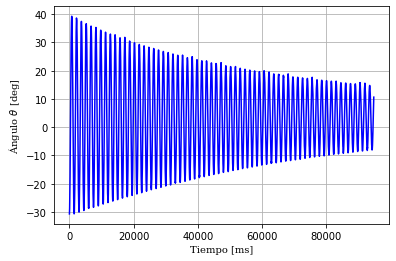

In [ ]:
plt.figure()
plt.plot(df['Tiempo[ms]'], df['AnguloDeg'], "b-")
plt.xlabel("Tiempo [ms]", fontdict={'family': 'serif'})
plt.ylabel("Ángulo $\\theta$ [deg]" , fontdict={'family': 'serif'})
plt.grid(True)

(0.0, 10000.0)

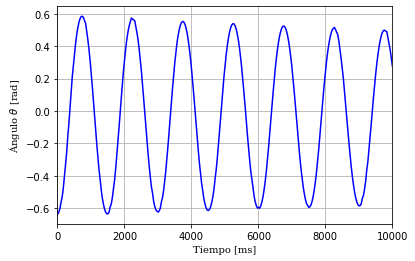

In [ ]:
plt.figure()
plt.plot(df['Tiempo[ms]'], df['AnguloRad'], "b-")
plt.xlabel("Tiempo [ms]", fontdict={'family': 'serif'})
plt.ylabel("Ángulo $\\theta$ [rad]" , fontdict={'family': 'serif'})
plt.grid(True)
plt.xlim(0, 10000)

Transformada de Fourier

In [ ]:
tf = fft(df['AnguloRad'].values)

In [ ]:
fftfreq?

In [ ]:
T = 66E-3 #Paso del tiempo

N = len(df['Tiempo[ms]'])
xf = fftfreq(N, T)[:N//2]

(0.0, 6.0)

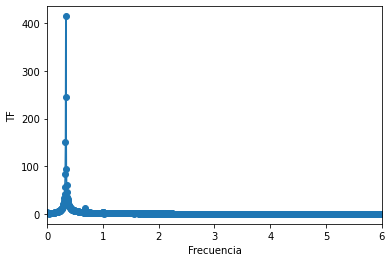

In [ ]:
plt.plot(xf[1:N//2], np.abs(tf[1:N//2]),"o-")
plt.ylabel("TF")
plt.xlabel("Frecuencia")
plt.xlim(0, 6)

In [ ]:
# Valor de frecuencia para el cual ocurre el maximo.
index = np.argmax(np.abs(tf[1:N//2]))
Frecuencia = xf[1:N//2][index]
Periodo = 1/Frecuencia 

print(f"La frecuencia del pendulo es:{Frecuencia:.5} Hz")
print(f"El periodo del péndulo es:{Periodo:.5} s")

La frecuencia del pendulo es:0.33528 Hz
El periodo del péndulo es:2.9826 s


Ajuste de modelo y datos experimentales


In [ ]:
# Fit 
def func(t, A,  omega , fi, b, C):
  return   C + A * np.cos(omega * t + fi)* np.exp(-b* t) # Función Movimiento Amortiguado

# def func(t, A,   fi, b ):
#   return   A * np.cos(2*np.pi*1.19 * t + fi)* np.exp(-b* t) # Función Movimiento Amortiguado

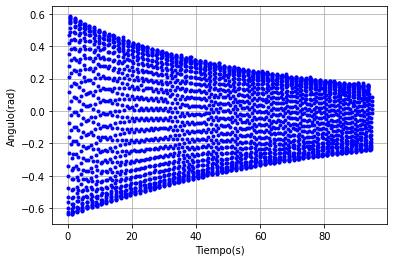

In [ ]:
vi = 0
plt.plot(df["Tiempo[ms]"].iloc[vi:]/1000, df["AnguloRad"].iloc[vi:],"b.")
plt.xlabel("Tiempo(s)")
plt.ylabel("Angulo(rad)")
plt.grid()

In [ ]:
popt, cov =  optimize.curve_fit(func, df["Tiempo[ms]"].iloc[vi:]/1000, df["AnguloRad"].iloc[vi:] )
cov

array([[ 5.79237671e-06,  1.73192611e-09, -7.90238528e-08,
        -1.92007592e-07,  9.68392397e-10],
       [ 1.73192611e-09,  1.04361524e-08, -3.14603525e-07,
        -6.76394088e-11,  3.66838735e-10],
       [-7.90238528e-08, -3.14603525e-07,  1.54946710e-05,
         2.83746363e-09, -2.11269696e-08],
       [-1.92007592e-07, -6.76394088e-11,  2.83746363e-09,
         1.04229251e-08, -1.99735807e-10],
       [ 9.68392397e-10,  3.66838735e-10, -2.11269696e-08,
        -1.99735807e-10,  4.28632138e-07]])

(0.0, 50.0)

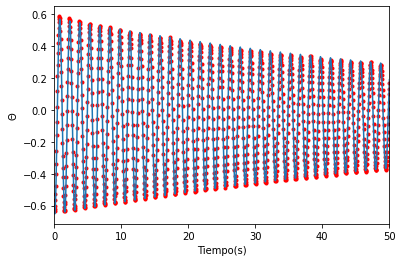

In [ ]:
plt.plot(df["Tiempo[ms]"]/1000, df["AnguloRad"],  "r.")
plt.plot( df["Tiempo[ms]"]/1000, func(df["Tiempo[ms]"]/1000, *popt))
plt.xlabel("Tiempo(s)")
plt.ylabel("$\\Theta $")
plt.xlim(0, 50)

In [ ]:
A,  omega , fi, b, C = popt

In [ ]:
print(f"Valor de la amplitud {A}")
print(f"Frecuencia angular {omega}")
print(f"Desfase {fi}")
print(f"Coeficiente de amortiguaiento {b}")

Valor de la amplitud -0.6132102348398512
Frecuencia angular 4.194980678315629
Desfase -0.16574593486373776
Coeficiente de amortiguaiento 0.01261674738120019


In [ ]:
omega/(2*np.pi)

1.1319419779309012

In [ ]:
import numpy as np

v

SyntaxError: ignored

In [ ]:
v(0)

TypeError: ignored